In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.8MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.batting_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data.bowling_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [11]:
data2.team1.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.team2.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [12]:
data2.toss_winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [13]:
data_f = data2.loc[data2.team1.isin(['Royal Challengers Bangalore','Sunrisers Hyderabad'])] 
data_f = data_f.loc[data_f.team2.isin(['Royal Challengers Bangalore','Sunrisers Hyderabad'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
431,432,2013,Bangalore,2013-04-09,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Royal Challengers Bangalore,0,7,V Kohli,M Chinnaswamy Stadium,S Ravi,SJA Taufel,NaN
480,481,2014,Bangalore,2014-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VA Kulkarni,NaN
502,503,2014,Hyderabad,2014-05-20,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,normal,0,Sunrisers Hyderabad,0,7,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,NJ Llong,NaN
524,525,2015,Bangalore,2015-04-13,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,DA Warner,M Chinnaswamy Stadium,RM Deshpande,RK Illingworth,NaN
567,568,2015,Hyderabad,2015-05-15,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,1,Royal Challengers Bangalore,0,6,V Kohli,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,NaN
579,580,2016,Bangalore,2016-04-12,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
602,603,2016,Hyderabad,2016-04-30,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,15,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


**Let's do Q1 now**

SRH Wins - 8
RCB Wins - 6


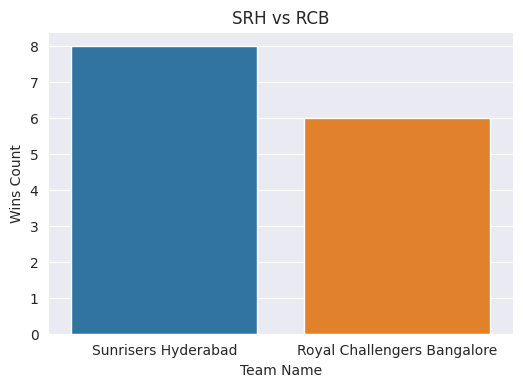

In [18]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('SRH vs RCB')
A,B =data_f.winner.value_counts()

print('SRH Wins -',A)
print('RCB Wins -',B)

plt.show()


Overall it's a good fight. Also in last 4 matches they have won 2-2 each.

Let's go with SRH as they have slight advantage overall

**Let's do Q2 now**

**Let's find average total runs by both teams**

In [17]:
data_n = data.loc[data.bowling_team.isin(['Royal Challengers Bangalore','Sunrisers Hyderabad'])]
data_n = data_n.loc[data.batting_team.isin(['Royal Challengers Bangalore','Sunrisers Hyderabad'])]

In [19]:
data_n.total_runs.sum()

4828

In [20]:
data_n.match_id.nunique()

14

In [22]:
np.round(4828/14,2) # Average Runs v SRH v RCB Contest

344.86

Let's mark 341-360 considering our analysis

**For Q3, Let's find balls taken to score 50 to 80 runs by both teams**

In [28]:
data_srh = data.loc[data.bowling_team.isin(['Royal Challengers Bangalore'])]
data_srh = data_srh.loc[data_srh.batting_team.isin(['Sunrisers Hyderabad'])]

In [37]:
data_r = data_srh.loc[(data_srh.over <=5)]

In [38]:
data_r.total_runs.sum()

633

In [39]:
data_r.match_id.nunique()

14

In [40]:
633/14 # Average runs by SRH v RCB in first 5 overs

45.214285714285715

In [41]:
data_r2 = data_srh.loc[(data_srh.over <=6)]

In [42]:
data_r2.total_runs.sum()

760

In [43]:
760/14

54.285714285714285

It's clear that SRH takes 5.3 overs on an average to score 50 runs.
Now finding it for 80 runs

In [44]:
data_r3 = data_srh.loc[(data_srh.over <=9)]

In [45]:
data_r3.total_runs.sum()

1076

In [46]:
1076/14

76.85714285714286

In [48]:
data_r4 = data_srh.loc[(data_srh.over <=10)]

In [49]:
data_r4.total_runs.sum()

1193

In [50]:
1193/14 

85.21428571428571

So, to score 80 runs SRH takes 9.3 runs on an average 

Therefore from 50 to 80 they take 24 balls on an average.


In [51]:
data_rcb = data.loc[data.batting_team.isin(['Royal Challengers Bangalore'])]
data_rcb = data_rcb.loc[data_rcb.bowling_team.isin(['Sunrisers Hyderabad'])]

In [55]:
data_r = data_rcb.loc[(data_rcb.over <=6)]

In [56]:
data_r.total_runs.sum()

687

In [57]:
687/14

49.07142857142857

In [61]:
data_r2 = data_rcb.loc[(data_rcb.over <=11)]

In [62]:
data_r2.total_runs.sum()

1195

In [63]:
1195/14

85.35714285714286

In [64]:
data_r3 = data_rcb.loc[(data_rcb.over <=10)]

In [65]:
data_r3.total_runs.sum()

1078

In [66]:
1078/14

77.0

RCB makes 50 runs in 6 over and 80 runs in approx 10.2 balls i.e 22 balls extra

Therefore the most likely is  0-8 runs difference only

**Let's do Q4**

**Let's find wickets losses by both teams in powerplay**

In [67]:
data_ws = data_srh.loc[(data_srh.over <=6)]

In [68]:
data_ws.player_dismissed.value_counts().sum()

13

In [69]:
13/12 # SRH average wickets

1.0833333333333333

In [70]:
data_wr = data_rcb.loc[(data_rcb.over <=6)]

In [71]:
data_wr.player_dismissed.value_counts().sum()

24

In [72]:
24/12 # RCB Average wickets 

2.0

Let's mark 0-1 considering our analysis

**Let's do Q5 now**

**Let's find  average dot balls in the match**

In [73]:
data_n.total_runs.value_counts()

1    1361
0    1063
4     391
2     262
6     216
5      10
3       6
7       1
8       1
Name: total_runs, dtype: int64

In [75]:
1063/12 # Average dot balls

88.58333333333333

Let's mark 81-110 considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

